In [1]:
from move import padded_translate
from plotting_fn import plt_imshow
import jax.random as jr
import matplotlib.pyplot as plt
import jax
import jax.numpy as jnp
from functools import partial
from gymnax.experimental.rollout import RolloutWrapper
from gymnax.environments.misc.puzzlepacking import PuzzlePacking, EnvState, create_puzzle

In [2]:
n_pieces = 7
grid_size = 6
min_piece_size = 3
max_piece_size = 5
name = 'grid6'

rollout = RolloutWrapper(env_name="PuzzlePacking",
                         env_params={'max_steps_in_episode': n_pieces},
                         env_kwargs={'n_pieces': n_pieces, 
                                     'grid_size': grid_size, 
                                     'min_piece_size': min_piece_size, 
                                     'max_piece_size': max_piece_size,})

In [3]:
env = PuzzlePacking(grid_size=grid_size,
                    n_pieces=n_pieces,
                    min_piece_size=min_piece_size,
                    max_piece_size=max_piece_size)
env_params = env.default_params
state = EnvState.init(jr.key(6),
                      grid_size=env.grid_size,
                      n_pieces=env.n_pieces,
                      min_piece_size=env.min_piece_size,
                      max_piece_size=env.max_piece_size)


/Users/martin/miniforge3/envs/summer_school/lib/python3.10/site-packages/jax/_src/ops/scatter.py:108: FutureWarning: scatter inputs have incompatible types: cannot safely cast value from dtype=float32 to dtype=bool with jax_numpy_dtype_promotion='standard'. In future JAX releases this will result in an error.
  warnings.warn(


In [ ]:
state = EnvState.init(jr.key(5),
                      grid_size=env.grid_size,
                      n_pieces=env.n_pieces,
                      min_piece_size=env.min_piece_size,
                      max_piece_size=env.max_piece_size)

plt_imshow()

In [4]:
puzzle, created = create_puzzle(jr.key(5),
              grid_size=env.grid_size,
              n_pieces=env.n_pieces,
              min_piece_size=env.min_piece_size,
              max_piece_size=env.max_piece_size,
              return_creation=True)

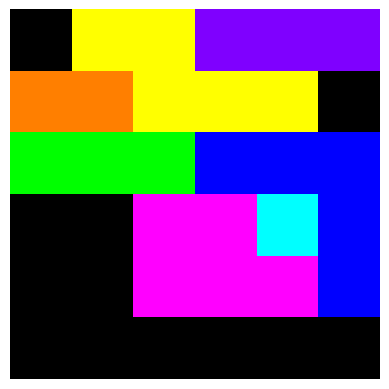

In [41]:
fig, ax = plt.subplots()

plt_imshow(puzzle, ax=ax)
fig.savefig('puzzle.png', dpi=300, bbox_inches='tight')

In [42]:
random_walk = jnp.sum(created, axis=0)

/var/folders/mw/r1_6wxyj02qdb8b9cff_3sh00000gn/T/ipykernel_20478/336686464.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


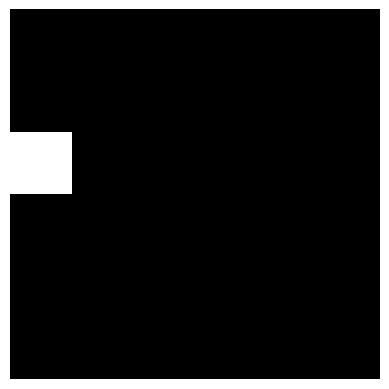

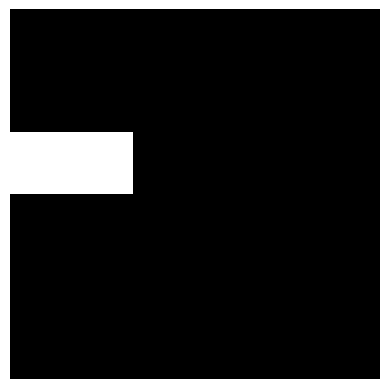

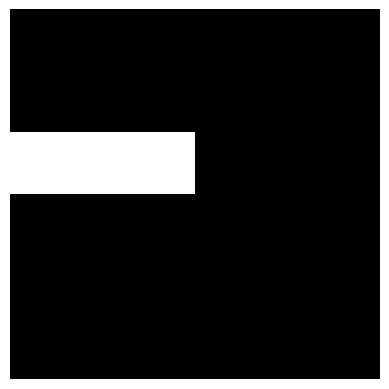

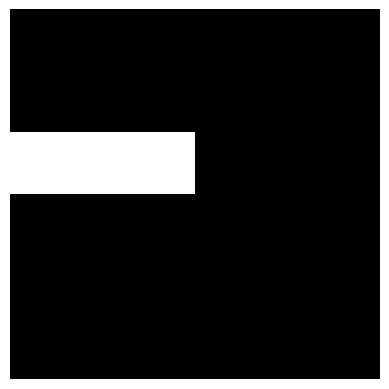

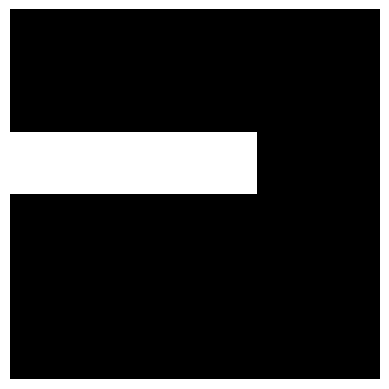

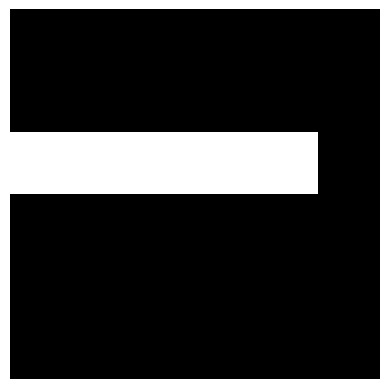

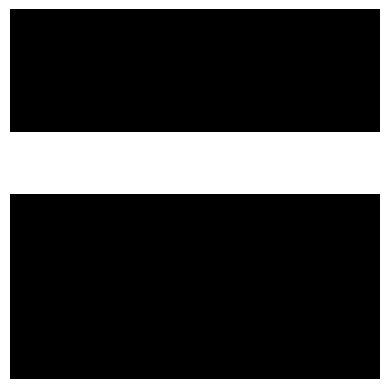

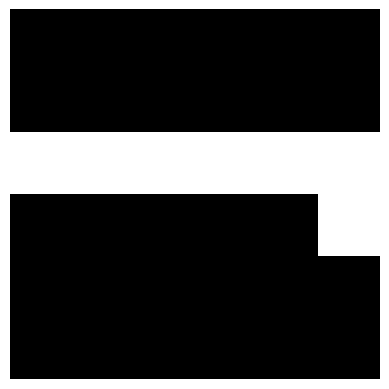

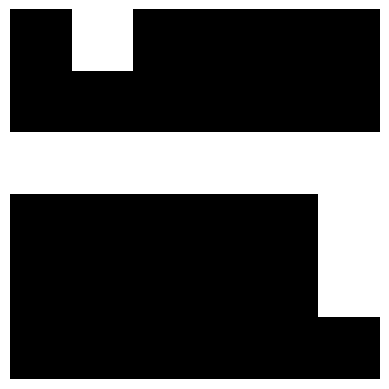

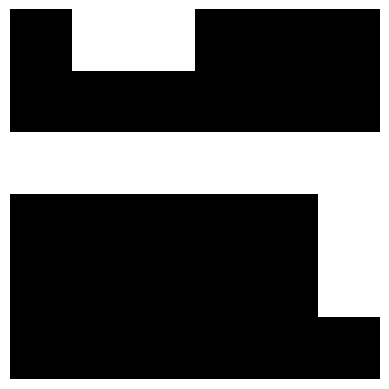

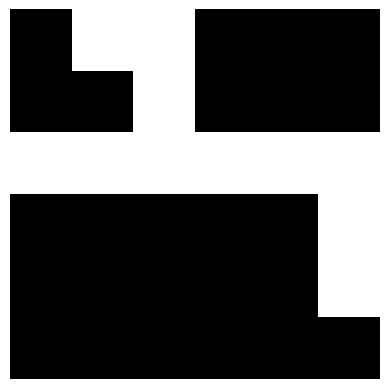

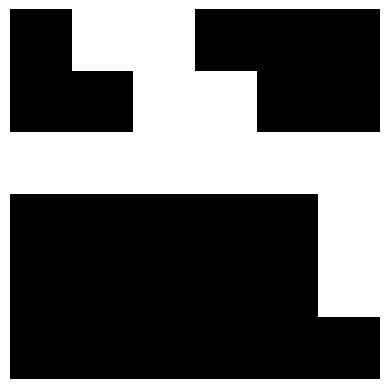

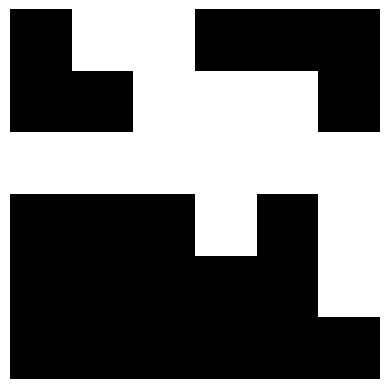

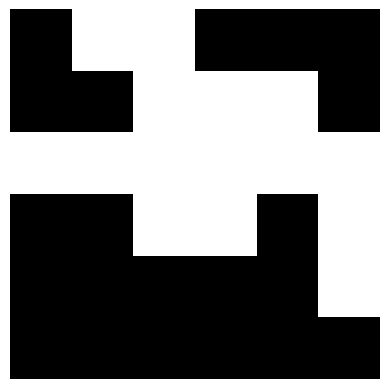

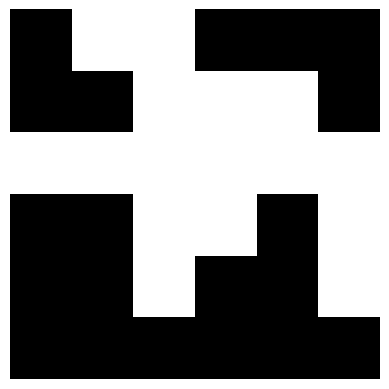

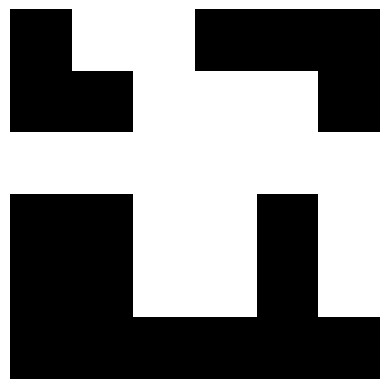

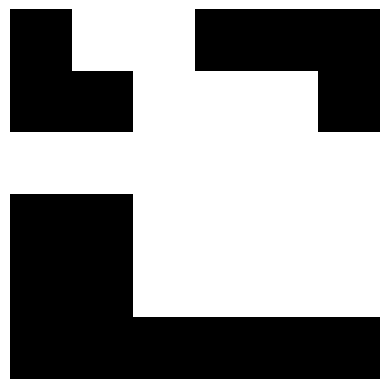

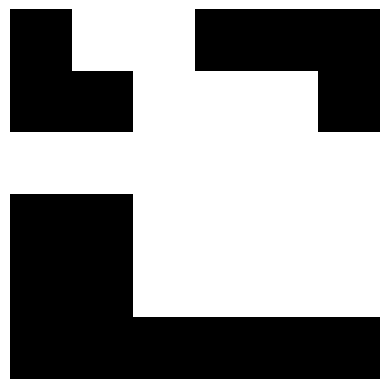

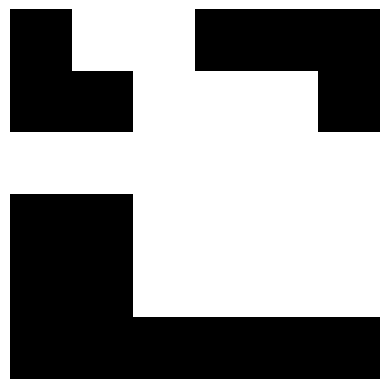

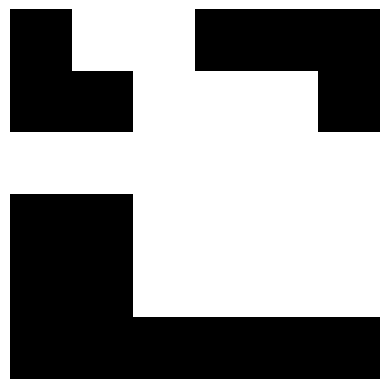

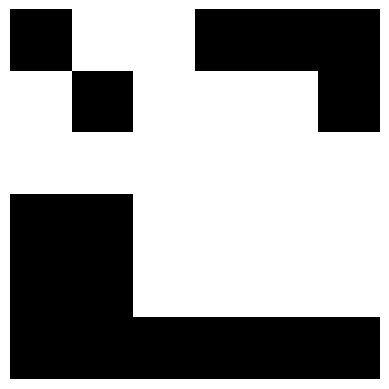

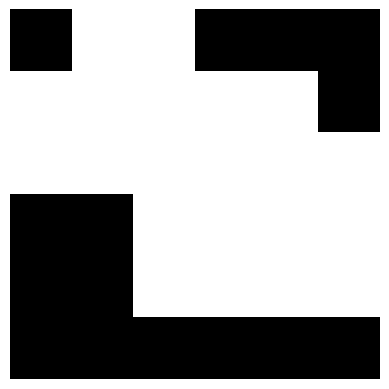

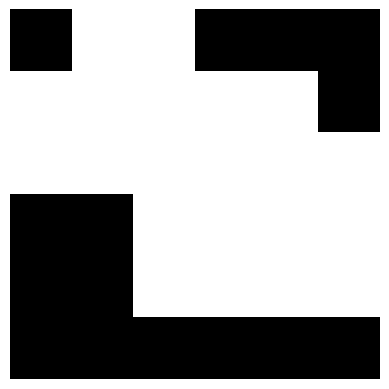

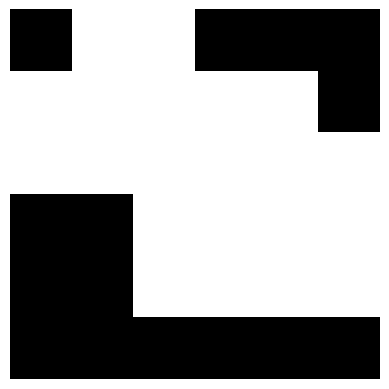

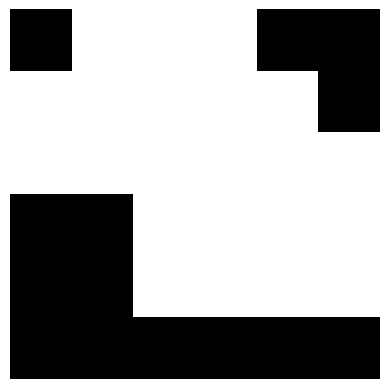

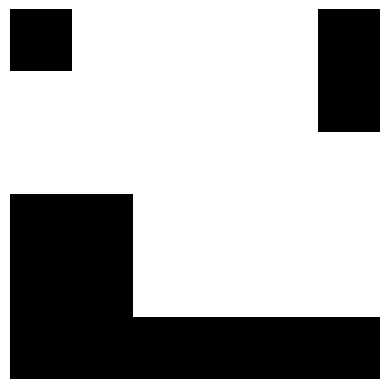

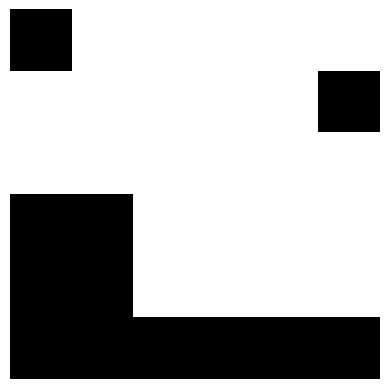

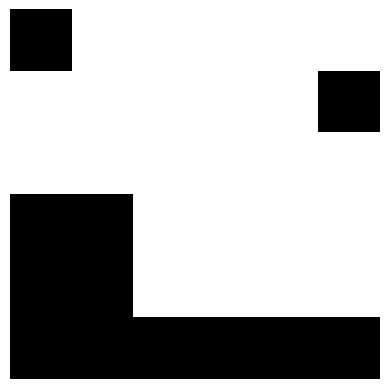

In [43]:
random_walk = (~created).reshape(7 * 4, 6,6)

for i in range(random_walk.shape[0]):
    fig, ax = plt.subplots()
    ax.imshow(random_walk[i], cmap='gray', vmin=0, vmax=1)
    ax.set_axis_off()
    fig.savefig(f'random_walk_{i:02d}.png', dpi=300, bbox_inches='tight')

In [14]:
random_walk

Array([[[7, 2, 3, 6, 7, 7],
        [5, 6, 3, 3, 3, 7],
        [0, 1, 1, 1, 2, 2],
        [7, 7, 4, 3, 4, 2],
        [7, 7, 4, 4, 4, 2],
        [7, 7, 7, 7, 7, 7]],

       [[7, 2, 2, 6, 6, 7],
        [5, 5, 3, 3, 3, 7],
        [0, 0, 1, 1, 1, 2],
        [7, 7, 3, 3, 4, 2],
        [7, 7, 4, 4, 4, 2],
        [7, 7, 7, 7, 7, 7]],

       [[7, 2, 2, 6, 6, 6],
        [5, 5, 2, 3, 3, 7],
        [0, 0, 0, 1, 1, 1],
        [7, 7, 3, 3, 4, 2],
        [7, 7, 3, 4, 4, 2],
        [7, 7, 7, 7, 7, 7]],

       [[7, 2, 2, 6, 6, 6],
        [5, 5, 2, 2, 3, 7],
        [0, 0, 0, 1, 1, 1],
        [7, 7, 3, 3, 4, 1],
        [7, 7, 3, 3, 4, 2],
        [7, 7, 7, 7, 7, 7]]], dtype=int32)

In [ ]:
_ = env.render(state, env_params)

In [ ]:
env.render(state, env_params)

In [ ]:
rewards = []

In [ ]:
rewards = []
for t in range(n_pieces+1):
    fig = env.render(state, env_params)
    fig.savefig(f"step_{t}.png", dpi=300, bbox_inches='tight')
    obs, state, reward, done, info = env.step_env(
        jr.key(0), state, 0, env_params
    )
    rewards.append(reward)

In [ ]:
gs

In [ ]:
sum(rewards)

In [ ]:
obs, action, reward, next_obs, done, cum_return, state = rollout.batch_rollout(jr.split(jr.key(0), 512), None)

In [ ]:
cum_return.min(), cum_return.max(), cum_return.mean()

In [ ]:
st = jax.tree.map(lambda x: x[0,0], state)

In [ ]:
for i in range(10):
    st = jax.tree.map(lambda x: x[0,i], state)
    rollout.env.render(st, rollout.env_params)

In [ ]:
grid = st.grid
piece = st.next_piece

In [ ]:
old_penalty = jnp.abs(grid).sum()
new_penalty = jnp.abs(grid + piece).sum()

In [ ]:
old_penalty - new_penalty

In [ ]:
grid = obs[0, 0, 0]
piece_1 = obs[0, 0, 1]

In [ ]:
grid+ piece_1

In [ ]:
piece_1

In [ ]:
grid

In [ ]:
jnp.abs(grid).sum()

In [ ]:
cum_return.min(), cum_return.max(), cum_return.mean()

In [ ]:
cum_return

In [ ]:
env, env_params = gymnax.make("PuzzlePacking")

In [ ]:
obs, state = env.reset(jr.key(0), env_params)

In [ ]:
env.render(state, env_params)

In [ ]:
state

In [ ]:
obs, state, reward, done, info = env.step(jr.key(1), state, 0, env_params)

In [ ]:
env.render(state, env_params), reward

In [ ]:
state.grid

In [ ]:
rolled_other_pieces = jnp.roll(state.other_pieces, shift=-1, axis=0)
rolled_other_pieces

In [ ]:
# set last piece to zero
rolled_other_pieces2 = rolled_other_pieces.at[-1].set(jnp.zeros_like(rolled_other_pieces[-1]))
rolled_other_pieces2

In [ ]:
padded_translate(state.next_piece.astype(float), shift=jnp.array((3, 3)), grid_size=4)

In [ ]:
gr = state.grid.astype(float) - 1
gr

In [ ]:
x = state.next_piece.astype(float)
x

In [ ]:
grid_size = 4
shift = jnp.array((3, 3))
padded_x = jnp.pad(
    x, ((0, grid_size-1), (0, grid_size-1)), mode="constant"
)
rolled = jnp.roll(padded_x, shift=shift, axis=(0, 1))
rolled
rolled_cropped = rolled[:grid_size, :grid_size]

In [ ]:
rolled.sum() - rolled_cropped.sum()

In [ ]:
rolled_cropped.sum()

In [ ]:
jnp.sum(jnp.abs(gr + x))

In [ ]:
env.render(state, env_params)

In [ ]:
key = jr.key(5)
grid_size = 4

n = 10
fig, axes = plt.subplots(n, n, figsize=(n*2, n*2))
puzzle_fn = partial(create_puzzle, 
                    grid_size=4,
                    n_pieces=4,
                    min_piece_size=2,
                    max_piece_size=4,
                    )
puzzles = jax.vmap(puzzle_fn)(jr.split(key, n*n))
for i, (puzzle, ax) in enumerate(zip(puzzles, axes.flat)):
    plt_imshow(puzzle, ax=ax)

In [ ]:
from region_generator import roll_top_left

In [ ]:
jax.vmap(roll_top_left)(puzzle[1:])

In [ ]:
puzzle = puzzle.astype(jnp.float32)

In [ ]:
puzzle

In [ ]:
plt_imshow(puzzle)

In [ ]:

@jax.jit
def sample_coord(key, prob_matrix):
    # Flatten the 4x4 matrix
    probs_flat = prob_matrix.reshape(-1)
    path_grid = jnp.full_like(prob_matrix, 0.0)

    # Sample an index according to the probability distribution
    idx = jr.choice(key, a=probs_flat.shape[0], p=probs_flat)

    # Convert flat index back to (row, col)
    row = idx // prob_matrix.shape[1]
    col = idx % prob_matrix.shape[1]

    prob_matrix = prob_matrix.at[row, col].set(False)  # Set the sampled position to 0
    path_grid = path_grid.at[row, col].set(1.0)  # Mark the sampled position in the path grid

    return jnp.array([row, col]), prob_matrix, path_grid

In [ ]:
import jax.random as jr
colors = jnp.array([
        [0, 0, 0],   # Red
        [0, 1, 0],   # Green
        [0, 0, 1],   # Blue
        [1, 1, 0],   # Yellow
        [1, 0, 1],   # Magenta
    ])

def plt_imshow(puzzle, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(4, 4))

    # Initialize blank RGB image
    H, W = puzzle.shape[1], puzzle.shape[2]
    rgb_image = jnp.zeros((H, W, 3))

    # Add each mask's color where it's True
    for i in range(puzzle.shape[0]):
        mask = puzzle[i]  # shape (H, W)
        for c in range(3):
            rgb_image = rgb_image.at[:, :, c].add(mask * colors[i, c])

    # Clip to [0, 1] in case of overlapping True values
    rgb_image = jnp.clip(rgb_image, 0, 1)

    # Plot
    ax.imshow(rgb_image)
    ax.set_axis_off()

@eqx.filter_jit
def create_puzzle(key: PRNGKeyArray, grid_size: int = 4, max_piece_size: int = 4):
    key_walk, key_sizes = jr.split(key)
    init_grid = jnp.ones((grid_size, grid_size), dtype=bool)
    pieces = 4
    piece_sizes = jr.randint(key_sizes, shape=(pieces,), minval=2, maxval=4)

    def place_piece(carry, piece_size):
        key, visited_grid = carry
        new_key, _ = jr.split(key)

        path_init = jnp.full((max_piece_size, 2), -1)
        start_pos, visited_grid, path_grid = sample_coord(key, visited_grid)

        path_init = path_init.at[0].set(start_pos)

        def step_fn(carry, _):
            pos, visited, path, path_grid, step, done, key = carry
            key, subkey = jr.split(key)

            def early_exit():
                return (pos, visited, path, path_grid, step, True, key), None

            def do_step():
                candidates = pos + deltas  # (4, 2)
                in_bounds = jnp.all((candidates >= 0) & (
                    candidates < grid_size), axis=1)
                cx, cy = candidates.T
                not_visited = visited[cx, cy]
                valid_mask = in_bounds & not_visited

                # If no valid moves, done=True
                any_valid = jnp.any(valid_mask)


                def no_valid():
                    return (pos, visited, path, path_grid, step, True, key), None

                def has_valid():
                    # Assign large negative logits to invalid moves so they won't be sampled
                    logits = jnp.where(valid_mask, 0.0, -1e9)
                    move_idx = jr.categorical(key, logits)
                    new_pos = candidates[move_idx]
                    visited_updated = visited.at[new_pos[0], new_pos[1]].set(False)
                    path_grid_updated = path_grid.at[new_pos[0], new_pos[1]].set(1.0)
                    path_updated = path.at[step + 1].set(new_pos)
                    return (new_pos, visited_updated, path_updated, path_grid_updated, step + 1, False, key), None

                return jax.lax.cond(any_valid, has_valid, no_valid)

            return jax.lax.cond(done, early_exit, do_step)  

        init_state = (start_pos, visited_grid, path_init, path_grid, 0, False, key)

        final_state, _ = jax.lax.scan(
            step_fn,
            init=init_state,
            xs=None,
            length=max_piece_size - 1)
        _, final_grid, _, new_path_grid, _, _, _ = final_state

        return (new_key, final_grid), new_path_grid
    init_carry = (key_walk, init_grid)
    (_, final_state), pieces = jax.lax.scan(
        place_piece,
        init=init_carry,
        xs=piece_sizes,
        )
    
    return jnp.concat((final_state[None, :], pieces), axis=0)

key = jr.key(5)
grid_size = 4

n = 10
fig, axes = plt.subplots(n, n, figsize=(n*2, n*2))
puzzles = jax.vmap(create_puzzle, in_axes=(0, None))(jr.split(key, n*n), grid_size)
for i, (puzzle, ax) in enumerate(zip(puzzles, axes.flat)):
    plt_imshow(puzzle, ax=ax)

In [ ]:

def plot_imshow(puzzle, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(4, 4))
    # Define distinct RGB colors for each mask
    colors = jnp.array([
        [0, 0, 0],   # Red
        [0, 1, 0],   # Green
        [0, 0, 1],   # Blue
        [1, 1, 0],   # Yellow
        [1, 0, 1],   # Magenta
    ])

    # Initialize blank RGB image
    H, W = puzzle.shape[1], puzzle.shape[2]
    rgb_image = jnp.zeros((H, W, 3))

    # Add each mask's color where it's True
    for i in range(puzzle.shape[0]):
        mask = puzzle[i]  # shape (H, W)
        for c in range(3):
            rgb_image = rgb_image.at[:, :, c].add(mask * colors[i, c])

    # Clip to [0, 1] in case of overlapping True values
    rgb_image = jnp.clip(rgb_image, 0, 1)

    # Plot
    fig, ax = plt.subplots(figsize=(4, 4))
    ax.imshow(rgb_image)
    ax.set_axis_off()

In [ ]:
jnp.concat((grid[None, :], pieces), axis=0)

In [ ]:
plt_imshow(grid)

In [ ]:
for i, piece in enumerate(pieces):
    print(f"Piece {i+1}:")
    plt_imshow(piece)
    plt.show()

In [ ]:

plt_imshow(final_grid)

In [ ]:
start_pos

In [ ]:
pos = start_pos

In [ ]:
candidates = pos + deltas
in_bounds = jnp.all((candidates >= 0) & (
            candidates < grid_size), axis=1)

cx, cy = candidates.T

In [ ]:
~visited_grid[cx, cy]

In [ ]:
candidates

In [ ]:
visited_grid

In [ ]:
import jax
import jax.numpy as jnp
from jax import random

@jax.jit
def sample_coord_from_mask(key, mask):
    flat_mask = mask.ravel().astype(jnp.float32)  # Convert bool → float
    probs = flat_mask / jnp.sum(flat_mask)        # Normalize to sum to 1

    flat_idx = random.choice(key, a=flat_mask.shape[0], p=probs)
    coord = jnp.unravel_index(flat_idx, mask.shape)
    return coord


In [ ]:
key = jr.key(3)
mask = jnp.array([[False, True, False],
                  [True, False, False],
                  [False, True, True]])

coord = sample_coord_from_mask(key, mask)
print(coord)  # e.g., (2, 1)
